In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [2]:
df = pd.read_excel(r'C:\Users\tyagir01\Desktop\Data Analytics Problem Set\Hierarchical_agglomerative_clustering_ex.xlsx')
df.set_index('Object')

,Variable 1,Variable 2
Object,,
1,2.00,2.0
2,5.50,4.0
3,5.00,5.0
4,1.50,2.5
5,1.00,1.0
6,7.00,5.0
7,5.75,6.5


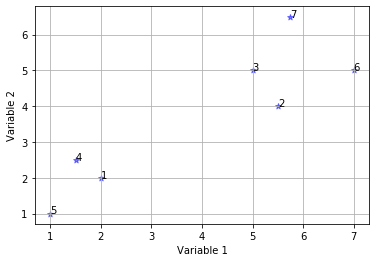

In [3]:
x = df['Variable 1']
y = df['Variable 2']
n = range(1,8) 

fig, ax = plt.subplots()
ax.scatter(x,y, marker = '*', c = 'b', alpha = .5)
plt.grid()
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

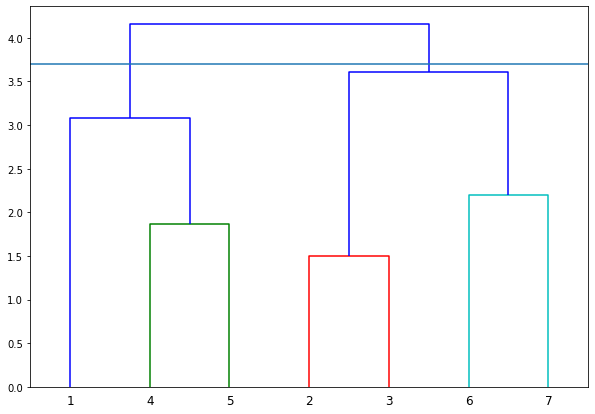

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df,'single')
labelList = range(1,8)

plt.figure(figsize = (10,7))

dendrogram(linked, orientation = 'top',labels = labelList, distance_sort = 'descending', show_leaf_counts = True)

plt.axhline(y = 3.7)
plt.show()

In [5]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [6]:
k = 3

H_cluster = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'single')
H_cluster.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3)

In [7]:
H_cluster.fit_predict(df)

array([0, 2, 2, 0, 0, 1, 1], dtype=int64)

In [8]:
print(H_cluster.labels_)

[0 2 2 0 0 1 1]


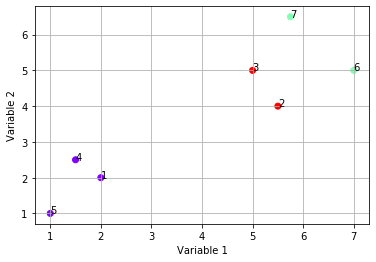

In [29]:
x = df['Variable 1']
y = df['Variable 2']
n = range(1,8) 

fig, ax = plt.subplots()
ax.scatter(x,y, c = H_cluster.labels_, cmap = 'rainbow')
plt.grid()
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))